In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
from seaborn import pairplot
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
import math

# reading our data
df = pd.read_csv('fwa.csv')
df.head()

,Response ID,Time Taken to Complete (Seconds),Seq. Number,Country Code,Region,Name (Write NA if you do not wish to disclose),Age (in years),Marital Status,Designation,Industry currently working in,Job satisfaction,Work/life balance,L&D,FWA,Career advancement,Y values,JS,WLB,L,FW
0,99667764,153,1,IN,MH,Priyansha Batra,1,1,Analyst,Consulting,3.11,3.17,2.45,1.50,4.31,1,1,1,0,0
1,99667832,174,1,IN,NaN,Palak Dua,1,1,Advanced Analyst,Assurance,2.47,3.00,2.45,1.75,3.80,1,0,1,0,0
2,99668252,329,1,IN,UP,Stutii,1,1,Analyst,Quality council of India,2.94,2.67,1.15,2.25,3.89,1,1,1,0,0
3,99668275,200,1,IN,DL,NaN,3,2,Associate,Banking,3.14,3.33,4.55,2.00,3.94,1,1,1,1,0
4,99668341,106,1,IN,UP,Jerry,1,1,Software engineer,Warner brothers,1.90,3.67,0.00,1.50,1.00,0,0,1,0,0


In [2]:
# finding correlation among our variables
corr1 = df["Job satisfaction"].corr(df["Work/life balance"])
corr2 = df["Job satisfaction"].corr(df["L&D"])
corr3 = df["Job satisfaction"].corr(df["FWA"])
corr4 = df["Work/life balance"].corr(df["L&D"])
corr5 = df["Work/life balance"].corr(df["FWA"])
corr6 = df["L&D"].corr(df["FWA"])

print("Correlation between Job satisfaction and Work/life balance is ", corr1)
print("Correlation between Job satisfaction and L&D is ", corr2)
print("Correlation between Job satisfaction and FWA is ", corr3)
print("Correlation between Work/life balance and L&D is ", corr4)
print("Correlation between Work/life balance and FWA is ", corr5)
print("Correlation between L&D and FWA is ", corr6)


Correlation between Job satisfaction and Work/life balance is  0.18395488778313918
Correlation between Job satisfaction and L&D is  0.19612601383164807
Correlation between Job satisfaction and FWA is  0.3378433209762151
Correlation between Work/life balance and L&D is  0.14581414600326198
Correlation between Work/life balance and FWA is  0.2396992961860213
Correlation between L&D and FWA is  0.07751178077542616


In [14]:
# making our training and test sets (in the 80%-20% division)

X = df[["Job satisfaction", "Work/life balance", "L&D", "FWA"]]

y = df[["Y values"]]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Now we will use our logistic regression classifier without PCA
# This is done to measure the effect of each individual variable on the outcome
# We cannot do this with PCA as the variables get combined in PCA

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train,y_train)

logreg_pred = logreg.predict(X_test)

log_odds = logreg.coef_
odds = np.exp(log_odds)

print("Odds with FWA are: ", odds)

Xt = df[["Job satisfaction", "Work/life balance", "L&D"]]

yt = df[["Y values"]]

Xt_train,Xt_test,yt_train,yt_test = train_test_split(Xt, yt, test_size=0.20, random_state=42)

logreg_t = LogisticRegression(max_iter=10000)
logreg_t.fit(Xt_train,yt_train)

logreg_pred_t = logreg_t.predict(Xt_test)

log_odds_t = logreg_t.coef_
odds_t = np.exp(log_odds_t)

print("Odds without FWA are: ", odds_t)

Odds with FWA are:  [[5.11904936 0.57955773 0.93533285 1.27535756]]
Odds without FWA are:  [[5.44340387 0.60250571 0.93464889]]


C:\Users\ritam\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ritam\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train1 = sc.fit_transform(X_train)
X_test1 = sc.transform(X_test)

from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
 
X_train1 = pca.fit_transform(X_train1)
X_test1 = pca.transform(X_test1)
 
explained_variance = pca.explained_variance_ratio_

C:\Users\ritam\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


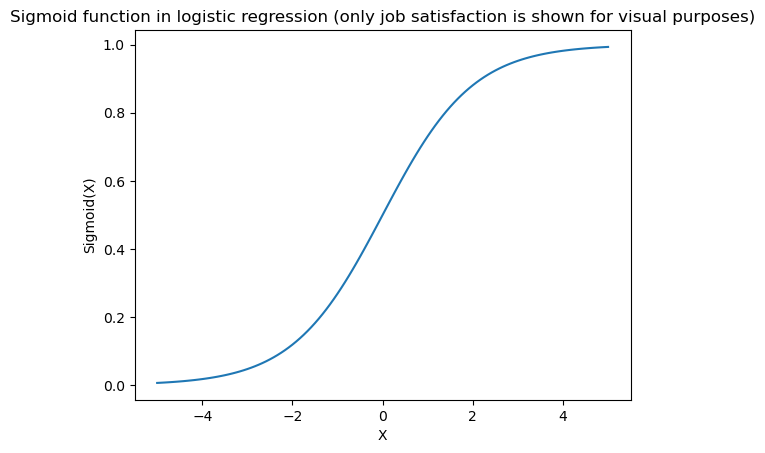

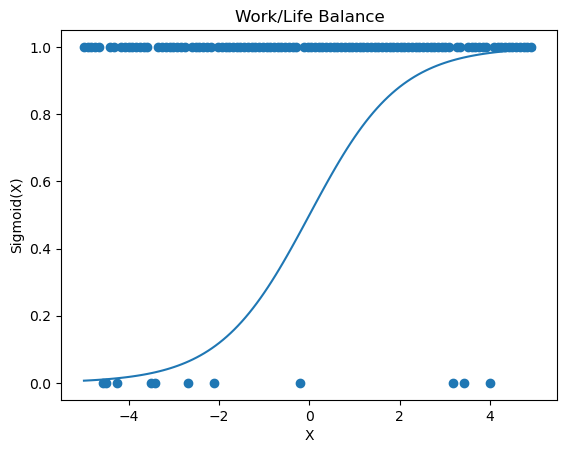

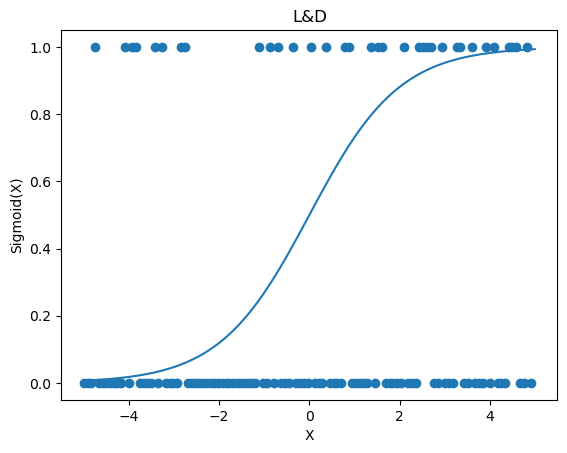

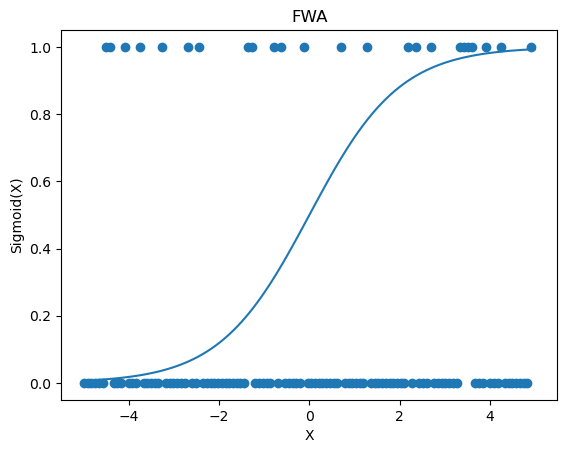

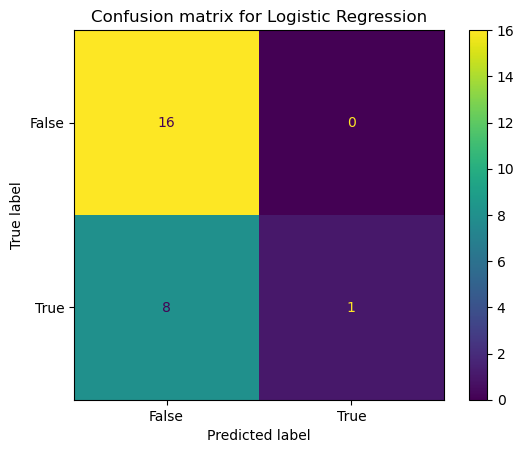

In [5]:
from scipy.special import expit

logreg_pca = LogisticRegression(max_iter=10000)
logreg_pca.fit(X_train1,y_train)

logreg_pred_pca = logreg_pca.predict(X_test1)

logreg_pca_cm = confusion_matrix(y_test, logreg_pred_pca)

p = np.linspace(-5, 5, 121)
z = 1/(1 + np.exp(-p))

import matplotlib.pyplot as plt

plt.title("Sigmoid function in logistic regression (only job satisfaction is shown for visual purposes)")
plt.plot(p, z)
# plt.scatter((df.index/12.1)-5, df[["JS"]])
plt.xlabel("X")
plt.ylabel("Sigmoid(X)")
plt.show()

plt.title("Work/Life Balance")
plt.plot(p, z)
plt.scatter((df.index/12.1)-5, df[["WLB"]])
plt.xlabel("X")
plt.ylabel("Sigmoid(X)")
plt.show()

plt.title("L&D")
plt.plot(p, z)
plt.scatter((df.index/12.1)-5, df[["L"]])
plt.xlabel("X")
plt.ylabel("Sigmoid(X)")
plt.show()

plt.title("FWA")
plt.plot(p, z)
plt.scatter((df.index/12.1)-5, df[["FW"]])
plt.xlabel("X")
plt.ylabel("Sigmoid(X)")
plt.show()

logreg_pca_display = metrics.ConfusionMatrixDisplay(confusion_matrix = logreg_pca_cm, display_labels = [False, True])
logreg_pca_display.plot()
plt.title("Confusion matrix for Logistic Regression")
plt.show()

C:\Users\ritam\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


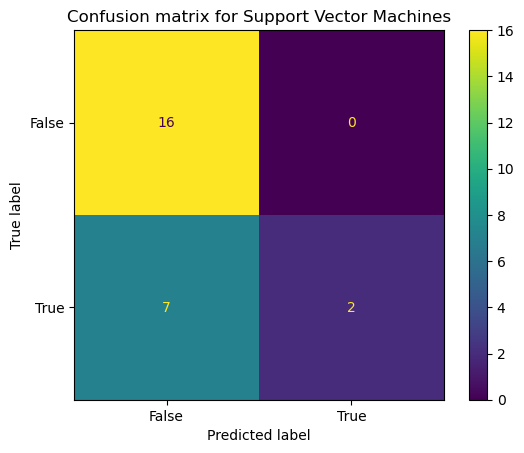

In [6]:
svm_pca = SVC(kernel = 'rbf')
svm_pca.fit(X_train1, y_train)

svm_pred_pca = svm_pca.predict(X_test1)

svm_pca_cm = confusion_matrix(y_test, svm_pred_pca)

svm_pca_display = metrics.ConfusionMatrixDisplay(confusion_matrix = svm_pca_cm, display_labels = [False, True])
svm_pca_display.plot()
plt.title("Confusion matrix for Support Vector Machines")
plt.show()

C:\Users\ritam\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


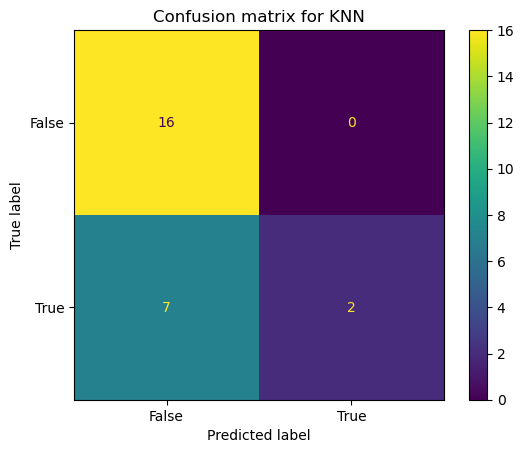

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


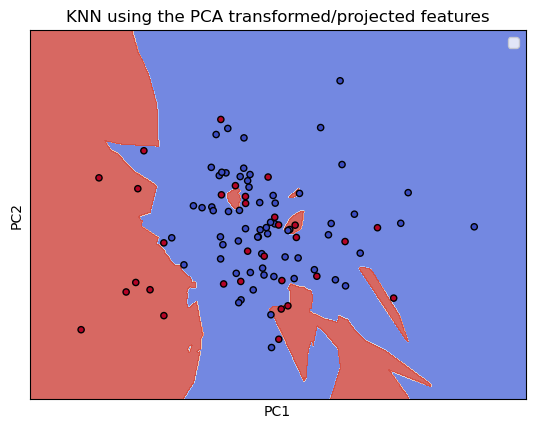

In [7]:
knn_pca = KNeighborsClassifier(n_neighbors=7)
knn_pca.fit(X_train1, y_train)

knn_pca_pred = knn_pca.predict(X_test1)

knn_pca_cm = confusion_matrix(y_test, knn_pca_pred)

knn_pca_display = metrics.ConfusionMatrixDisplay(confusion_matrix = knn_pca_cm, display_labels = [False, True])
knn_pca_display.plot()
plt.title("Confusion matrix for KNN")
plt.show()

def make_meshgrid(x1, y1, h=.02):
    x_min, x_max = x1.min() - 1, x1.max() + 1
    y_min, y_max = y1.min() - 1, y1.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, knn_plot = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X_train1[:, 0], X_train1[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(knn_plot, knn_pca, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
knn_plot.scatter(X0, X1, c=np.array(y_train), cmap=plt.cm.coolwarm, s=20, edgecolors='k')
knn_plot.set_ylabel('PC2')
knn_plot.set_xlabel('PC1')
knn_plot.set_xticks(())
knn_plot.set_yticks(())
knn_plot.set_title('KNN using the PCA transformed/projected features')
knn_plot.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


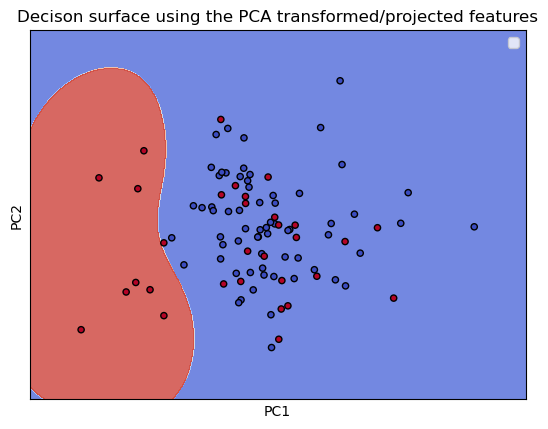

In [8]:
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X_train1[:, 0], X_train1[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm_pca, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=np.array(y_train), cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decison surface using the PCA transformed/projected features')
ax.legend()
plt.show()

In [9]:
from sklearn.metrics import accuracy_score

score_logreg = accuracy_score(y_test, logreg_pred_pca)
print('Accuracy of logistic regression: ', score_logreg)

score_knn = accuracy_score(y_test, knn_pca_pred)
print('Accuracy of KNN: ', score_knn)

score_svm = accuracy_score(y_test, svm_pred_pca)
print('Accuracy of SVM: ', score_svm)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision of logistic regression:",metrics.precision_score(y_test, logreg_pred_pca))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall of logistic regression:",metrics.recall_score(y_test, logreg_pred_pca))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision of KNN:",metrics.precision_score(y_test, knn_pca_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall of KNN:",metrics.recall_score(y_test, knn_pca_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision of SVM:",metrics.precision_score(y_test, svm_pred_pca))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall of SVM:",metrics.recall_score(y_test, svm_pred_pca))

Accuracy of logistic regression:  0.68
Accuracy of KNN:  0.72
Accuracy of SVM:  0.72
Precision of logistic regression: 1.0
Recall of logistic regression: 0.1111111111111111
Precision of KNN: 1.0
Recall of KNN: 0.2222222222222222
Precision of SVM: 1.0
Recall of SVM: 0.2222222222222222


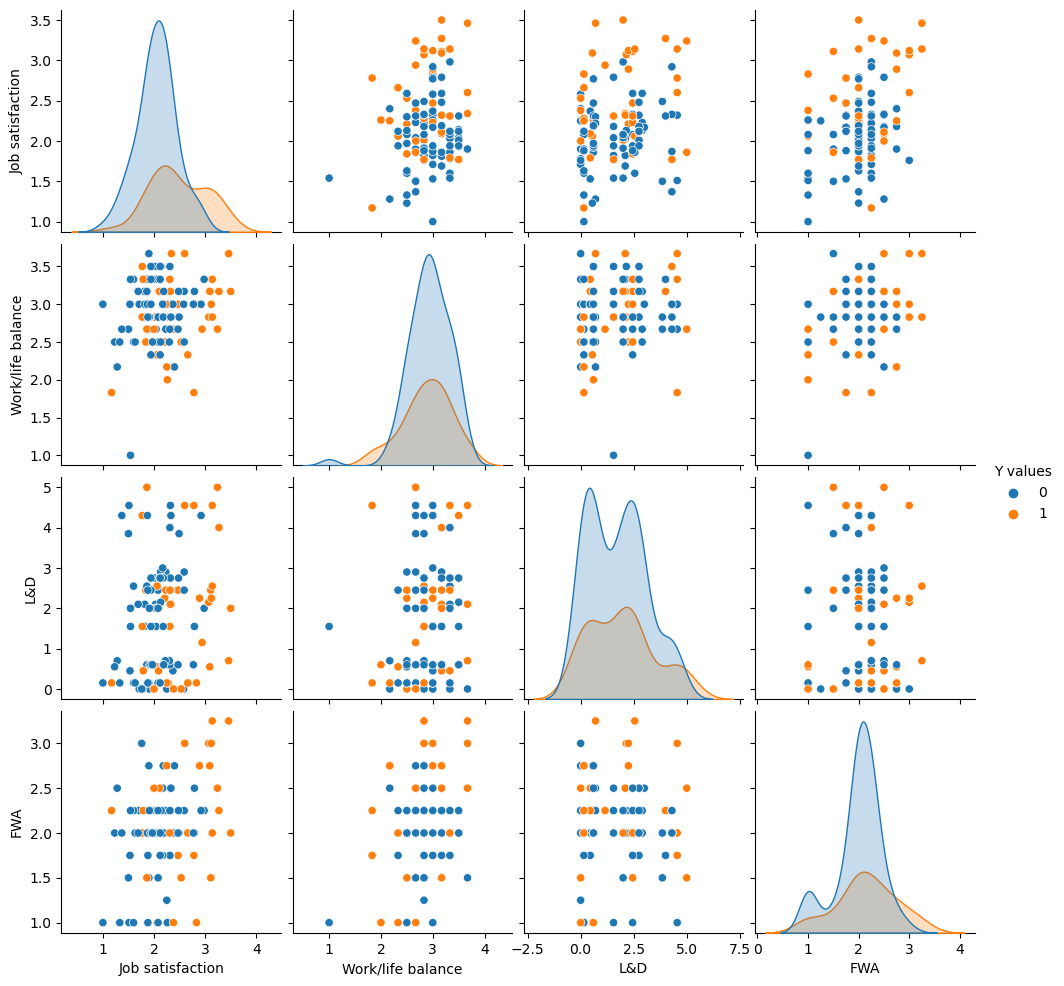

In [10]:
pairplot(df[["Job satisfaction", "Work/life balance", "L&D", "FWA", "Y values"]], hue='Y values')
plt.show()

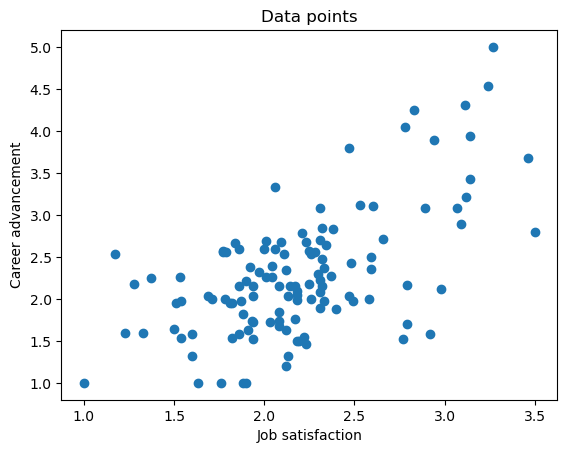

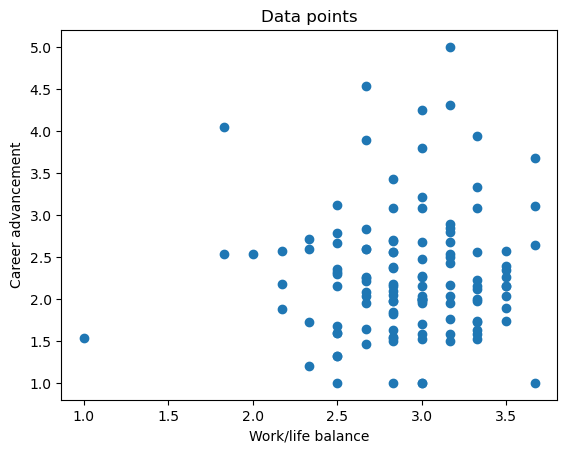

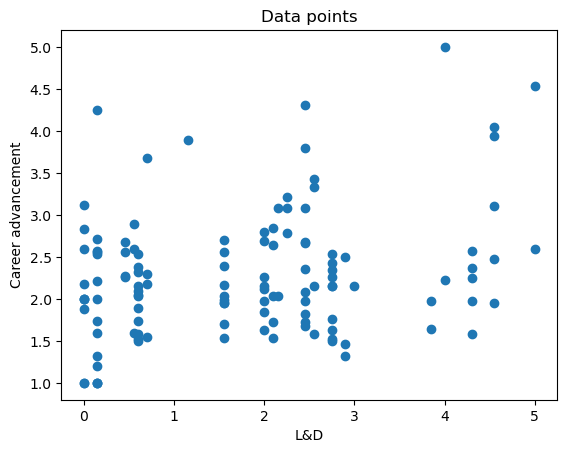

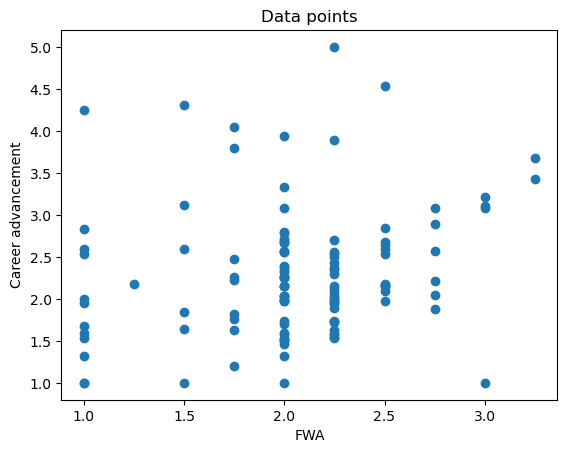

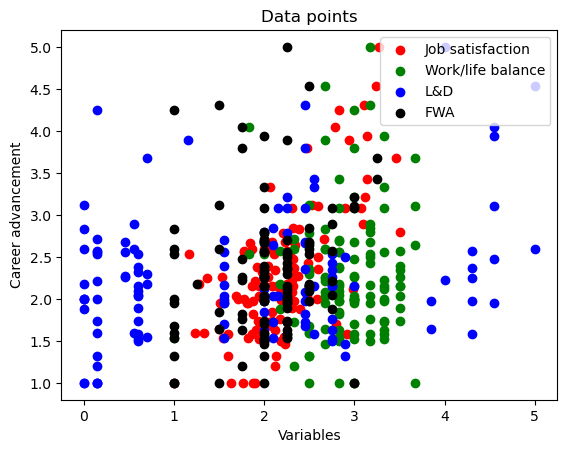

In [11]:
from mlxtend.plotting import plot_decision_regions

X1 = df[["Job satisfaction"]]
X2 = df[["Work/life balance"]]
X3 = df[["L&D"]]
X4 = df[["FWA"]]

y = df[["Career advancement"]]

# plt.figure()
plt.title("Data points")
plt.scatter(X1, y)
plt.xlabel("Job satisfaction")
plt.ylabel("Career advancement")
plt.show()

# plt.figure()
plt.title("Data points")
plt.scatter(X2, y)
plt.xlabel("Work/life balance")
plt.ylabel("Career advancement")
plt.show()

# plt.figure()
plt.title("Data points")
plt.scatter(X3, y)
plt.xlabel("L&D")
plt.ylabel("Career advancement")
plt.show()

# plt.figure()
plt.title("Data points")
plt.scatter(X4, y)
plt.xlabel("FWA")
plt.ylabel("Career advancement")
plt.show()

plt.title("Data points")
plt.scatter(X1, y, label ='Job satisfaction', color = "red")
plt.scatter(X2, y, label ='Work/life balance', color = "green")
plt.scatter(X3, y, label ='L&D', color = "blue")
plt.scatter(X4, y, label ='FWA', color = "black")
plt.xlabel("Variables")
plt.ylabel("Career advancement")
plt.legend(loc='upper right')
plt.show()

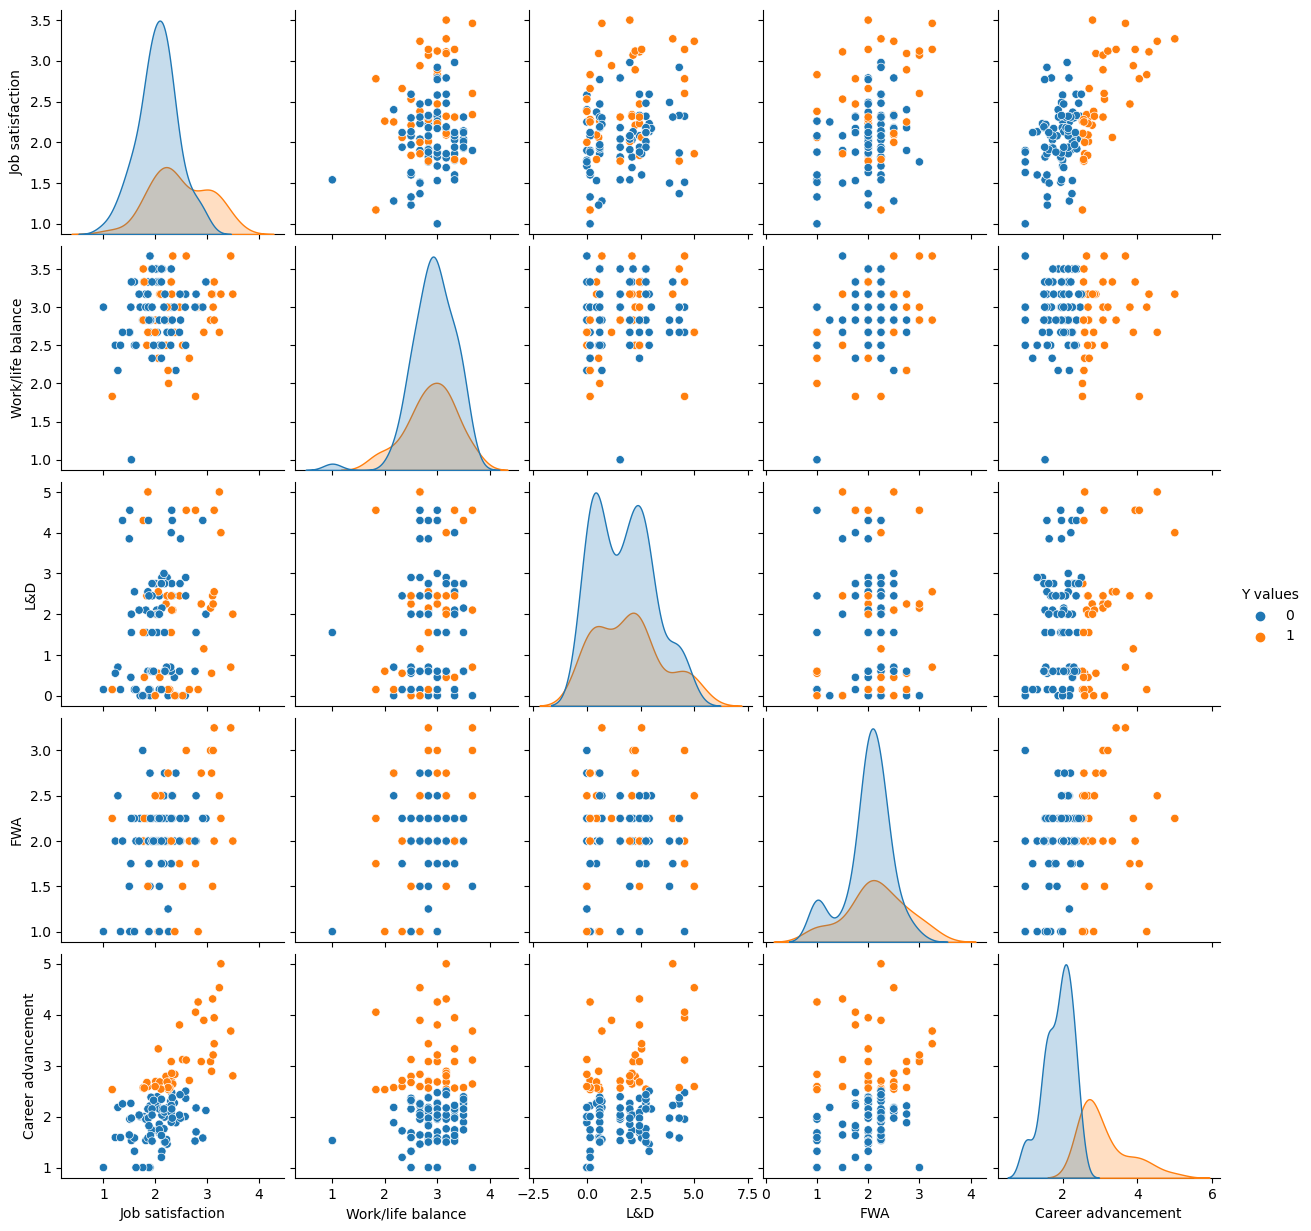

In [12]:
pairplot(df[["Job satisfaction", "Work/life balance", "L&D", "FWA", "Career advancement", "Y values"]], hue='Y values')
plt.show()